# Exploratory Data Analysis


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

#### Loading dataset

In [6]:
df_path = "../data/data0.csv"
df = pd.read_csv(df_path)

In [7]:
df.head()

,topic,title,text,author,date,visitors,rate,vote_count,key_words
0,Крими,Нова измама: Точат ни банковите карти,Нова измама с източване на кредитни карти върл...,Мария Атанасова,2020-10-19 08:10,26 138,2.4,44.0,"['банкови', 'карти', 'банка', 'измама']"
1,Култура,Почина братът на Карлос Сантана,"Китаристът Хорхе Сантана, по-младият брат на К...",Венелина Маринова,2020-05-19 10:05,1 538,4.5,2.0,"['карлос', 'сантана', 'брат', 'почина', 'хорхе..."
2,Авто,Над 1000 коня за следващото BMW M5,Новото поколение на BMW M5 ще има изцяло елект...,Георги Касабов,2020-06-01 10:06,4 087,3.7,9.0,"['bmw', 'm5', '5er', 'g60']"
3,Любопитно,Владо Карамазов пребори коварна диагноза,Театралната и кинозвезда Владимир Карамазов пр...,Събина Андреева,2021-08-20 09:08,8 896,3.5,17.0,"['владо', 'карамазов', 'диагноза', 'болест', '..."
4,Крими,"Постоянен арест за дрогирания тираджия, предиз...",Окръжен съд - Бургас остави за постоянно в аре...,Мария Атанасова,2020-09-14 18:09,3 518,NaN,0.0,['айтос']


### Articles in each category:

In [8]:
df.groupby(['topic']).size()

topic
Авто          2504
Бизнес        1981
Имоти         1563
Крими         2494
Култура       2513
Любопитно     3125
Спорт         3646
Технологии    2333
dtype: int64

<AxesSubplot:xlabel='topic'>

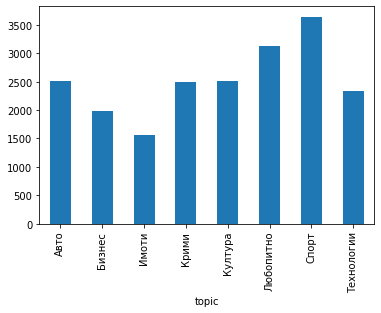

In [9]:
df.groupby(['topic']).size().plot.bar()

### Percentage of articles in each category

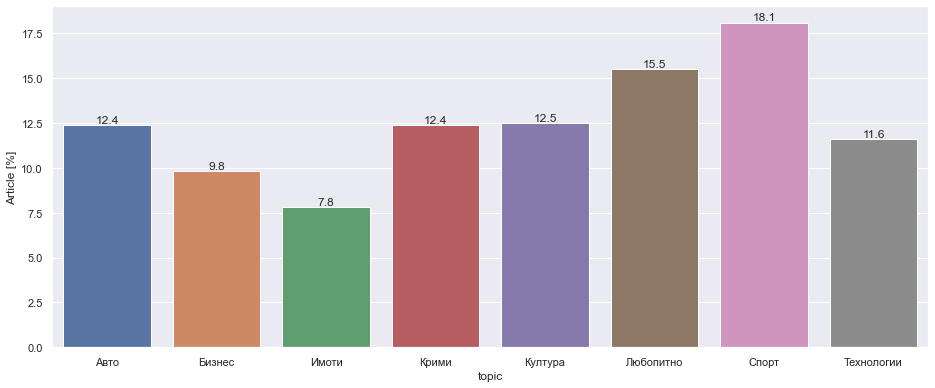

In [27]:
percentage_df = df.groupby('topic').size().transform(lambda x: x / x.sum() * 100).reset_index()
percentage_df.columns = ['topic', 'Article [%]']
percentage_df = percentage_df.round({'Article [%]': 1})
sns.set(rc={'figure.figsize':(15.7,6.27)})
ax = sns.barplot(x='topic', y='Article [%]', data=percentage_df)
for i in ax.containers:
    ax.bar_label(i,)

### Authors count by category

In [11]:
df.groupby(['topic']).agg(count_distinct_authors=('author', 'nunique')).reset_index()

,topic,count_distinct_authors
0,Авто,9
1,Бизнес,40
2,Имоти,16
3,Крими,18
4,Култура,29
5,Любопитно,13
6,Спорт,12
7,Технологии,17


### Distribution in time

In [12]:
df['date'] = df['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))
df['date'] = df['date'].astype("datetime64")


<AxesSubplot:xlabel='year'>

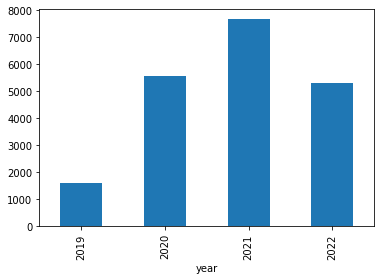

In [13]:
df.groupby([df["date"].dt.year])['topic'].count().plot(kind="bar", xlabel=('year'))

<AxesSubplot:xlabel='(year, month)'>

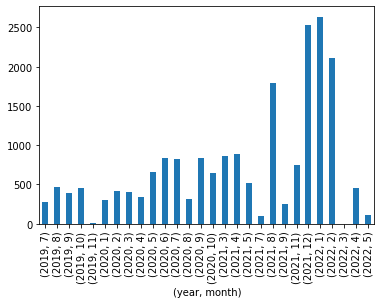

In [14]:
df.groupby([df["date"].dt.year, df["date"].dt.month])['topic'].count().plot(kind="bar", xlabel=('year', 'month'))

### Article lenght distribution

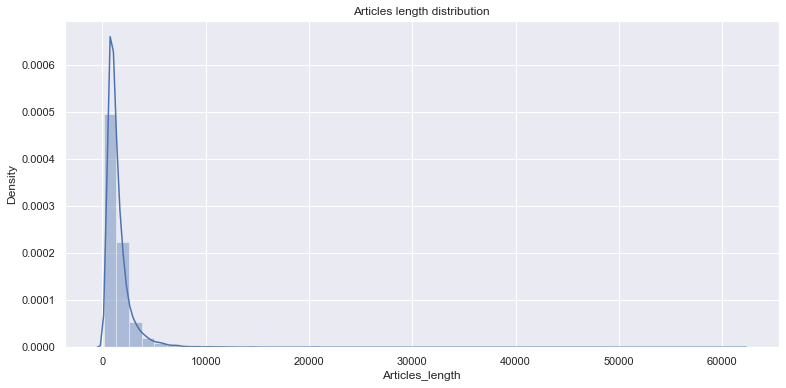

In [37]:
df['Articles_length'] = df['text'].str.len()
plt.figure(figsize=(12.8,6))
sns.distplot(df['Articles_length']).set_title('Articles length distribution');

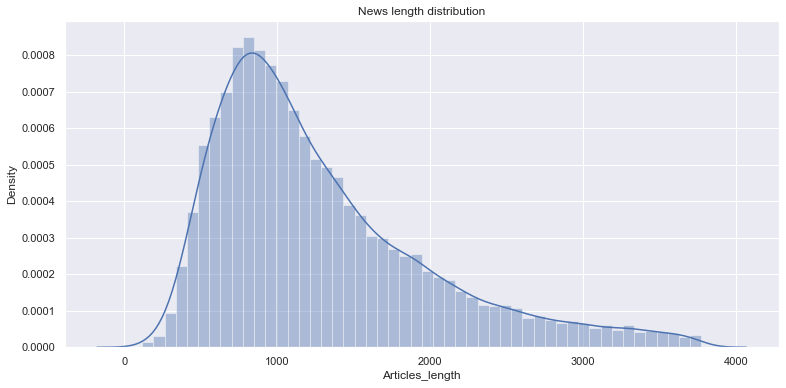

In [38]:
quantile_95 = df['Articles_length'].quantile(0.95)
df_95 = df[df['Articles_length'] < quantile_95]
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['Articles_length']).set_title('News length distribution');


In [39]:
df['Articles_length'].describe()

count    20159.000000
mean      1521.910660
std       1511.652499
min        117.000000
25%        789.000000
50%       1132.000000
75%       1760.000000
max      61702.000000
Name: Articles_length, dtype: float64

In [42]:
df_more10k = df[df['Articles_length'] > 60000]
len(df_more10k)

1

In [46]:
df_more10k.iloc[0]

topic                                                        Култура
title                                        Какъв беше Гоце Делчев?
text               Настоящият опус от документални свидетелства е...
author                                                         Факти
date                                             2022-02-03 13:02:00
visitors                                                       5 887
rate                                                             4.4
vote_count                                                      19.0
key_words          ['гоце', 'делчев', 'вмро', 'българин', 'македо...
Articles_length                                                61702
Name: 8699, dtype: object

In [47]:
df_more10k.iloc[0]['text']

'Настоящият опус от документални свидетелства е специално допълнен и актуализиран с нова информация по случай 150-годишния юбилей от рождението на Гоце Делчев на 04.02.2022г..\r\n\r\nЦелта на този материал е да даде насока как могат да бъдат преодолени трудностите в работата на съвместната мултидисциплинарна експертна комисия по историческите и образователни въпроси на България и Северна Македония. Както е добре известно, съгласно чл.8 от подписания през 2017г. Договор за приятелство, добросъседство и сътрудничество, целта на работата на специално създадената комисия е „да допринесе за обективното, основаващо се на автентични и основани на доказателства исторически извори, научно тълкуване на историческите събития“.В изминалите над 4 години обаче не бяха постигнати съществени резултати, като в последните 2 години основна пречка от македонска страна се оказа признаването на българската етническа принадлежност на един от главните апостоли на македонското освободително дело – Гоце Делчев.